# Hồi quy vectơ hỗ trợ (SVR)

Máy vectơ hỗ trợ (SVM) được biết đến nhiều qua các bài toán phân loại; tuy nhiên, việc sử dụng SVM trong hồi quy không được ghi chép đầy đủ. Các loại mô hình này được gọi là hồi quy vectơ hỗ trợ (SVR). SVR là một thuật toán hồi quy hỗ trợ cả hồi quy tuyến tính và phi tuyến tính. Phương pháp này hoạt động trên nguyên tắc của SVM. SVR khác với SVM ở chỗ: SVM là bộ phân loại được sử dụng để dự đoán các nhãn hạng mục rời rạc trong khi SVR là bộ hồi quy được sử dụng để dự đoán các biến được sắp xếp liên tục. Trong lab này, chúng ta sẽ học cách triển khai SVR sử dụng scikit-learn.

## Import thư viện

Trước tiên, hãy import các thư viện hữu ích.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import tập dữ liệu

Sau đó, hãy import tập dữ liệu và chia thành ma trận đặc trưng và các giá trị dự đoán.

In [13]:
path_file = "C:/Users/Nguyễn Hoài Nam/OneDrive/Machine Learning/Lab_Exercise_MLP302x_Regression/LAB/lab6/datat_set/Position_Salaries.csv"

In [14]:
dataset = pd.read_csv(path_file)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [15]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [16]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [17]:
## Yêu cầu 1: reshape y từ một mảng hàng các số thành mảng cột các số
## VIẾT CODE Ở ĐÂY: 
y = y.reshape(-1,1)

<details><summary> Gợi ý </summary>

[numpy.reshape()](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)

</details>

In [18]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Co giãn đặc trưng

Sau đó, sử dụng StandardScaler để co giãn dữ liệu.

In [19]:
## Yêu cầu 2:

## VIẾT CODE Ở ĐÂY: 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

<details><summary> Gợi ý </summary>

Using ```StandardScaler()``` on both X and y

</details>

In [20]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [21]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Huấn luyện mô hình SVR trên toàn bộ tập dữ liệu

Huấn luyện

In [23]:
## Yêu cầu 3:
from sklearn.svm import SVR

## VIẾT CODE Ở ĐÂY: 
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

<details><summary> Gợi ý </summary>

[SVR()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

</details>

## Dự đoán kết quả mới

Đưa ra dự đoán

In [24]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

In [30]:
sc_X.inverse_transform(X)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

## Hiển thị kết quả SVR

Hiển thị tập dữ liệu và đường cong hồi quy để xem liệu mô hình tốt đủ chưa.

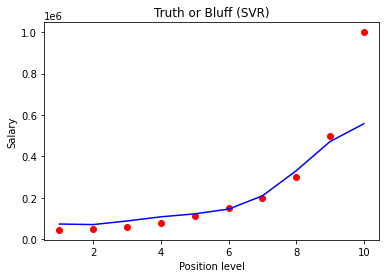

In [28]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Hiển thị kết quả SVR (cho phân giải cao hơn và đường cong mượt hơn)

Hiển thị mô hình lần nữa

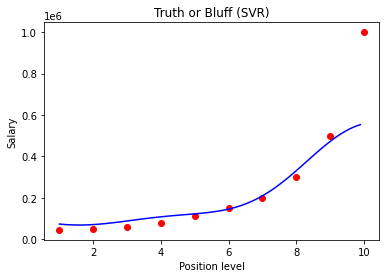

In [31]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()